# How to get the best of 1000 Restaurants in only 30 days?

You live in a city with 1000 restaurants. Some restaurants are good, others are not and you have no previous knowledge about the quality/value of a restaurant. Should you test all of them then choose your favorite? (full exploration) but what if you are staying only 10 days in the city? Then should you test only 2 or 3 then quickly 'stick' to best one for the next weeks? (full exploitation) but what if you miss much better restaurants just because you did not 'explore' enough, ending up sticking to low value restaurants?

# It comes to finding the optimal ratio between Exploration and Exploitation

You got it! it is a balance between Exploration (trying new options) and Exploitation (getting maximum benefit from 1 well-known option).

# This Optimal Exploration time is 9 days! The Sweet Spot is ~ 30%

Actually the Exploration time depends NOT on the number of Restaurants but it DEPENDS ON YOUR TIME. If we assume you are going to the restaurant every day, then you should explore new restaurants during 6 days then stick to the best restaurant among these 6 for the remaining 24 days!

Important: we will prove this algorithmically in the simulation below, but this is not a perfect mathematical proof.

# Algorithmic proof

## Assumptions

Let's fix some values to be able to run the simulation: 1000 restaurants, 30 days.

Important: the result remains ~ the same after testing with different values of N Restaurants and n days. Please feel free to modify parameters and run this simulation.

In [80]:
import numpy as np

total_number_of_restaurants = 1000
total_number_of_times_going_to_restaurant = 30

## We affect to values to the restaurant, according to a distribution (uniform here)
restaurants = [n for n in range(1,total_number_of_restaurants+1)]
len(restaurants)

1000

The whole challenge is that restaurants have different values, so let's build a realistic distributions of 'values' for our restaurants (~from 0/10 to 10/10 with average of 5/10). We are using a Normal Distribution with mean = 5 and sd = 2.

Important: the result remains ~ the same after testing with different values of mean and sd. Please feel free to modify parameters and run this simulation.

In [81]:
## Restaurants with value between 0 and 10, with average = 5/10, and sd=2 here.
restaurants = np.random.normal(loc=5, scale=2, size=total_number_of_restaurants)
len(restaurants) ## We check we have 1000 restaurants.

1000

In [82]:
np.mean(restaurants) ## We check that the average value/quality of a restaurant is 5/10.

4.943503418624576

In [83]:
import pandas as pd
performance_comparison = pd.DataFrame(columns=["Ratio_Exploration","Total_Value"])
performance_comparison['Ratio_Exploration'] = performance_comparison['Ratio_Exploration'].astype(int)
performance_comparison['Total_Value'] = performance_comparison['Total_Value'].astype(int)

## Montecarlo simulation

Let's run 1000 simulations (to be able to calculate an average behaviour) trying different Exploration_Ratios:

In [84]:
for montercarlo_iteration in range(1,1000):    
    ## Iterate over different Exploration Ratios
    for number_of_explorations in range(1,total_number_of_times_going_to_restaurant):
        restaurants_explored = np.random.choice(restaurants, number_of_explorations, replace=False) ## by default replace=True, but we want replace=False 
        # (since in the exploration phase, you try each restaurant once only!)

        ## Best restaurant
        value_best_restaurant = np.max(restaurants_explored)

        ## Value from exploration
        value_exploration = np.sum(restaurants_explored)

        ## Value from exploitation: we choose the best restaurant and 'stick' to it
        value_exploitation = (total_number_of_times_going_to_restaurant-number_of_explorations)*value_best_restaurant

        ## Total value
        total_value = value_exploration + value_exploitation

        ## Add results for comparison
        performance_comparison = performance_comparison.append({'Ratio_Exploration':number_of_explorations/total_number_of_times_going_to_restaurant, 'Total_Value':total_value},ignore_index=True)


In [85]:
## All observations
print(performance_comparison.shape)
performance_comparison.head()

(28971, 2)


,Ratio_Exploration,Total_Value
0,0.033333,58.275213
1,0.066667,159.830575
2,0.100000,219.126541
3,0.133333,164.535139
4,0.166667,248.884805


## Results: 30% seems to be the Optimal Exploration time

We can now plot the Total_Value in function of the Exploration_Ratio (all observations):

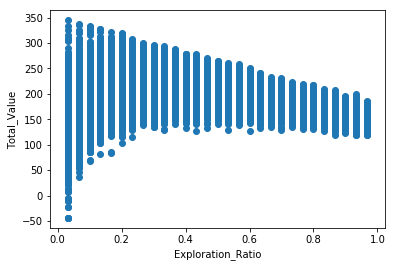

In [86]:
## Plot Total_Value for each iteration:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(performance_comparison.Ratio_Exploration, performance_comparison.Total_Value)
plt.ylabel('Total_Value')
plt.xlabel('Exploration_Ratio')
plt.show()

Keeping only the averages, let's plot again the Total_Value in function of the Exploration_Ratio:

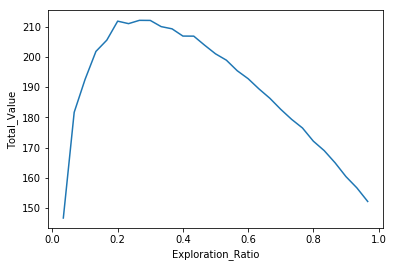

In [87]:
## Summarise by averaging for each specific Number_of_Explorations
performance_comparison_averaged = performance_comparison.groupby('Ratio_Exploration').mean()

## Plot Exploration_Value in function of the Exploration_Ratio
plt.plot(performance_comparison_averaged.Total_Value)
plt.ylabel('Total_Value')
plt.xlabel('Exploration_Ratio')
plt.show()

## Adjacent problem: 'Multi-Armed Bandit'

We have considered here that 1 restaurant has only 1 constant value, instead of considering that for this restaurant the value may be 6/10 today, 5/10 yesterday, 7/10 tomorrow, i.e. following itself a statistical distributions. In this case it would have been the famous 'Multi-Armed Bandit' problem, here is more information: https://en.wikipedia.org/wiki/Multi-armed_bandit.